In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sys
import os
from os.path import join,expanduser,split

parent_dir = split(os.getcwd())[0]
sys.path.append(join(parent_dir,'filter_stat_modules'))
from filter_functions import *
from stat_functions import correlation_scalar_scalar_uncert


# # adjoint sensitivities location
adj_sens_loc = 'EasternGulfCoast'

# # prediction point location
place_id = adj_sens_loc

difference_opt = False                 # True if differencing two sets of forcing impacts
if difference_opt:
    case_id_0 = 'ERA5_JRA55do'
    case_id_1 = 'ECCO_JRA55do'
else:
    # # forcing case identifier
    case_id = 'ECCO_JRA55do'

# # variance explained of reconstruction ('reconstr') or tide gauge obs ('tgauge', 'altim')
varexp_type = 'reconstr'

# # lead extent identifier
maxlead_id = '5yr'

# # years included in prediction
years_to_predict = np.arange(1997,2018)
year_range_id = "_".join([str(year) for year in years_to_predict[[0,-1]]])


# # filename
curr_year_range_id = year_range_id + ''
forcsens_regions_dir = join(expanduser('~'),'Downloads','ECCO_v4r4_adjoint','forcing_stats')
if difference_opt:
    case_id = case_id_0 + ''
    if 'ERA5' in case_id_0:
        curr_year_range_id = '1984_2022'
if varexp_type == 'reconstr':
    forcsens_regions_filename = join(forcsens_regions_dir,\
                                 case_id+'_impact_altim_'+place_id+'_withtrend_GulfNAtl_regions_'\
                                     +maxlead_id+'_'+curr_year_range_id)
else:
    forcsens_regions_filename = join(forcsens_regions_dir,\
                                 case_id+'_impact_'+varexp_type+'_'+place_id+'_withtrend_GulfNAtl_regions_'\
                                 +maxlead_id+'_'+curr_year_range_id)

ds_forcsens = xr.open_dataset(forcsens_regions_filename,engine='zarr')
year_range_ind = np.logical_and(ds_forcsens.pred_year.values >= years_to_predict[0],\
                                ds_forcsens.pred_year.values <= years_to_predict[-1]).nonzero()[0]
ds_forcsens = ds_forcsens.isel(pred_year=year_range_ind)

if difference_opt:
    ds_forcsens_0 = ds_forcsens.copy()
    curr_year_range_id = year_range_id + ''
    case_id = case_id_1 + ''
    if 'ERA5' in case_id_1:
        curr_year_range_id = '1984_2022'
    if varexp_type == 'reconstr':
        forcsens_regions_filename = join(forcsens_regions_dir,\
                                     case_id+'_impact_altim_'+place_id+'_withtrend_GulfNAtl_regions_'\
                                         +maxlead_id+'_'+curr_year_range_id)
    else:
        forcsens_regions_filename = join(forcsens_regions_dir,\
                                     case_id+'_impact_'+varexp_type+'_'+place_id+'_withtrend_GulfNAtl_regions_'\
                                     +maxlead_id+'_'+curr_year_range_id)
    
    ds_forcsens_1 = xr.open_dataset(forcsens_regions_filename,engine='zarr')
    year_range_ind = np.logical_and(ds_forcsens_1.pred_year.values >= years_to_predict[0],\
                                    ds_forcsens_1.pred_year.values <= years_to_predict[-1]).nonzero()[0]
    ds_forcsens_1 = ds_forcsens_1.isel(pred_year=year_range_ind)

    ds_forcsens = ds_forcsens_1 - ds_forcsens_0

C:\Users\adelman\Documents\py_functions\filter_functions.py:45: RuntimeWarning: divide by zero encountered in log
  bandpass_filter = 0.5*(special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(low_bound/half_power_adj))) - special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(high_bound*half_power_adj))))


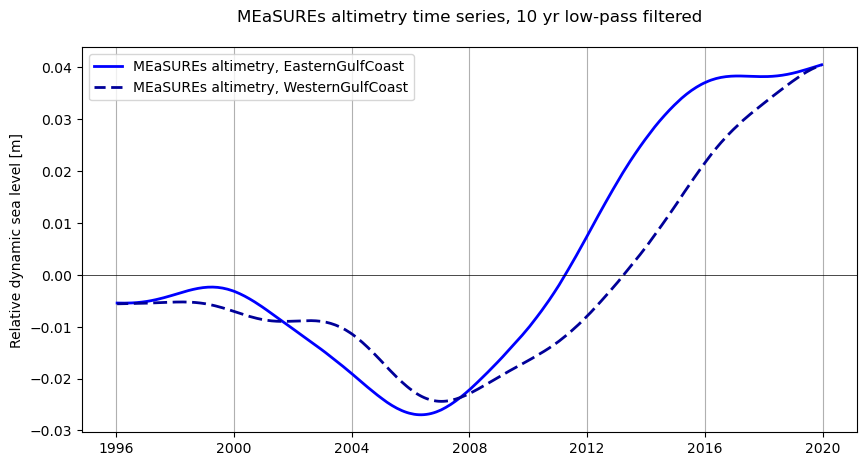

In [1]:
# # altimetry time series only

# import numpy as np
# import xarray as xr
# import matplotlib.pyplot as plt
# from os.path import join,expanduser

# import sys
# sys.path.append(join(expanduser('~'),'Documents','py_functions'))
# from filter_functions import *
# from stat_functions import correlation_scalar_scalar_uncert

# forcsens_regions_dir = join(expanduser('~'),'Downloads','ECCO_v4r4_adjoint','forcing_stats')
# forcsens_regions_filename = join(forcsens_regions_dir,\
#                                  'ERA5_JRA55do_impact_altim_EasternGulfCoast_withtrend_GulfNAtl_regions_'\
#                                  +'5yr_1984_2022')
# ds_forcsens_E = xr.open_dataset(forcsens_regions_filename,engine='zarr')
# forcsens_regions_filename = join(forcsens_regions_dir,\
#                                  'ERA5_JRA55do_impact_altim_WesternGulfCoast_withtrend_GulfNAtl_regions_'\
#                                  +'5yr_1984_2022')
# ds_forcsens_W = xr.open_dataset(forcsens_regions_filename,engine='zarr')

# alt_10yr_E,alt_trendline_E = bandpass_err_fcn(ds_forcsens_E.obs_tseries_sortmonth.values.transpose().flatten()[108:],\
#                                     axis=-1,delta_dim=365.24/12,high_bound=1/(10*365.24),power_cutoff_opt=1,\
#                                     steepness_factor=2,trend_handling_opt=1,edge_handling_opt=1,uneven_edge_handling_opt=0)
# alt_10yr_W,alt_trendline_W = bandpass_err_fcn(ds_forcsens_W.obs_tseries_sortmonth.values.transpose().flatten()[108:],\
#                                     axis=-1,delta_dim=365.24/12,high_bound=1/(10*365.24),power_cutoff_opt=1,\
#                                     steepness_factor=2,trend_handling_opt=1,edge_handling_opt=1,uneven_edge_handling_opt=0)

# plot_tseries_predtime = ds_forcsens_E.pred_time.values.transpose().flatten()

# fig,ax = plt.subplots(1,1,figsize=(10,5))
# ax.plot(plot_tseries_predtime[108:],\
#         alt_10yr_E,\
#         color=(0,0,1),linewidth=2,label='MEaSUREs altimetry, EasternGulfCoast')
# ax.plot(plot_tseries_predtime[108:],\
#         alt_10yr_W,\
#         color=(0,0,.6),linewidth=2,linestyle=(1,(5,2)),label='MEaSUREs altimetry, WesternGulfCoast')
# ax.set_ylabel('Relative dynamic sea level [m]')
# ax.grid(axis='x')
# ax.axhline(y=0,color=(0,0,0),linewidth=0.5)
# ax.set_title('MEaSUREs altimetry time series, 10 yr low-pass filtered\n')
# # ax.set_xlim([np.datetime64(str(years_to_predict[0])+'-01-01','ns'),\
# #              np.datetime64(str(years_to_predict[-1]+1)+'-01-01','ns')])
# ax.legend()
# plt.savefig('RSL_tseries_altim_10yrlp_edgemasked_EasternGulfCoast_WesternGulfCoast_1993_2022.png')
# plt.show()

In [3]:
plot_tseries_predtime = ds_forcsens.pred_time.values.transpose().flatten()

In [4]:
def nanmask_create(array):
    mask = np.logical_and(np.logical_and(~np.isnan(array),~np.isinf(array)),np.abs(array) >= 1.e-15)
    
    return mask

def corr_zerolag(tseries_1,tseries_2):
    curr_outputs = correlation_scalar_scalar_uncert(tseries_1,tseries_2,\
                                                    axis=-1,delta_dim=365.24/12,delta_lag=365.24/12,\
                                                    lag_range_to_test=(0,365.24))
    curr_coeff_zerolag = curr_outputs[0][(np.abs(curr_outputs[6]) < 1.e-3).nonzero()[0]][0]

    return curr_coeff_zerolag


def var_compute(array,axis):
    mask = nanmask_create(array)
    array -= (np.nansum(mask*array,axis=axis,keepdims=True)/\
              np.nansum(mask,axis=axis,keepdims=True))
    array_var = np.nansum(mask*(array**2),axis=axis)/np.nansum(mask,axis=axis)

    return array_var

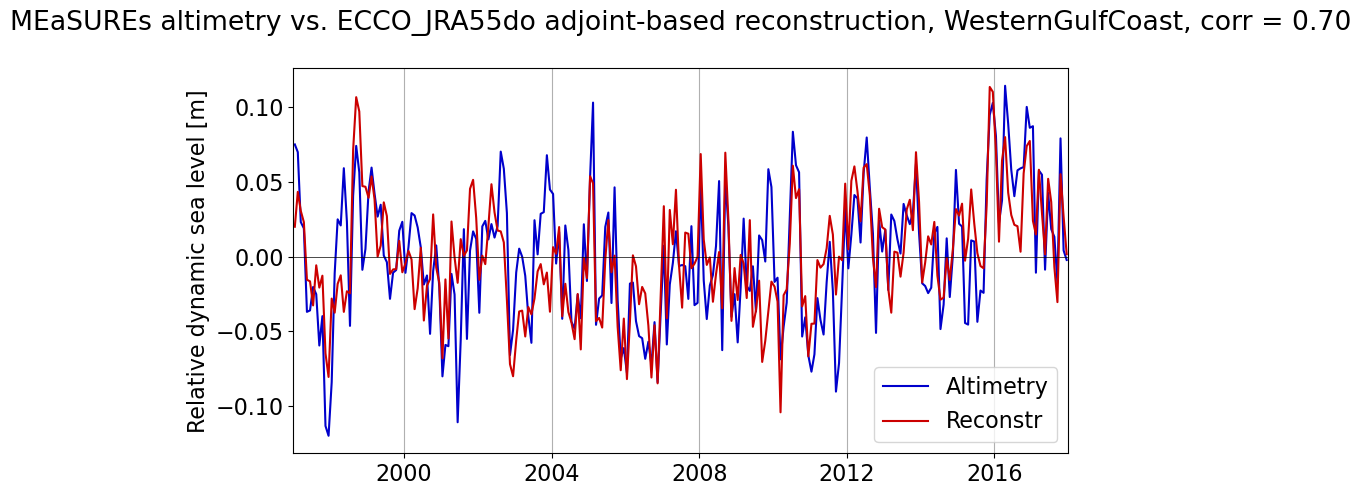

In [50]:
corr_coeff_zerolag = corr_zerolag(ds_forcsens.reconstr_total.values.transpose().flatten(),\
                                   ds_forcsens.obs_tseries_sortmonth.values.transpose().flatten())

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(plot_tseries_predtime,\
        ds_forcsens.obs_tseries_sortmonth.values.transpose().flatten(),\
        color=(0,0,.8),label='Altimetry')
ax.plot(plot_tseries_predtime,\
        ds_forcsens.reconstr_total.values.transpose().flatten(),\
        color=(.8,0,0),label='Reconstr')
ax.set_ylabel('Relative dynamic sea level [m]')
ax.grid(axis='x')
ax.axhline(y=0,color=(0,0,0),linewidth=0.5)
ax.set_title('MEaSUREs altimetry vs. '+case_id+' adjoint-based reconstruction, '+place_id\
             +', corr = '+str(.01*np.round(corr_coeff_zerolag/.01))[:4]+'\n')
ax.set_xlim([np.datetime64(str(years_to_predict[0])+'-01-01','ns'),\
             np.datetime64(str(years_to_predict[-1]+1)+'-01-01','ns')])
ax.legend()
plt.savefig('RSL_tseries_altim_'+case_id+'_reconstr_'+place_id+'_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

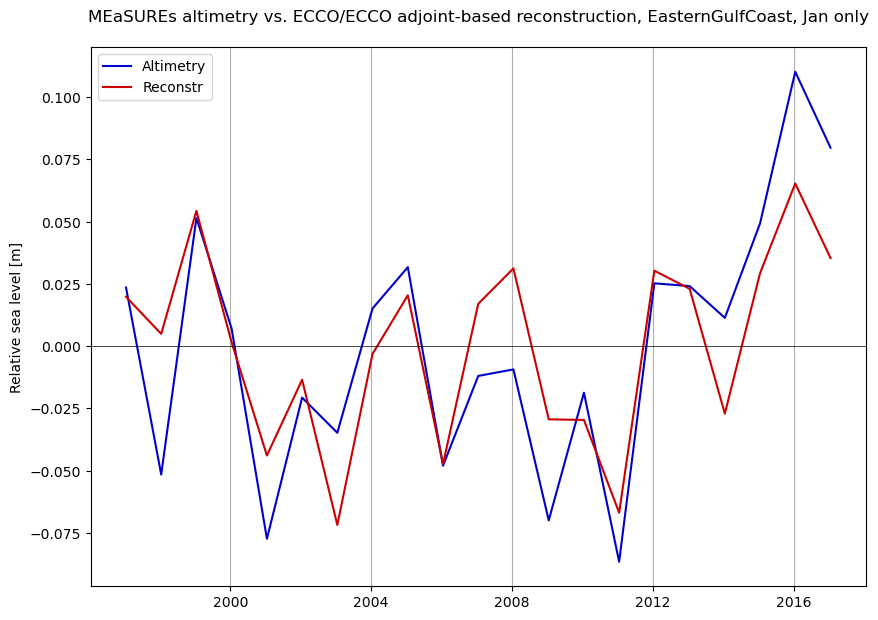

In [5]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(ds_forcsens.pred_time[0,:].values,\
        ds_forcsens.obs_tseries_sortmonth[0,:].values,\
        color=(0,0,.8),label='Altimetry')
ax.plot(ds_forcsens.pred_time[0,:].values,\
        ds_forcsens.reconstr_total[0,:].values,\
        color=(.8,0,0),label='Reconstr')
ax.set_ylabel('Relative dynamic sea level [m]')
ax.grid(axis='x')
ax.axhline(y=0,color=(0,0,0),linewidth=0.5)
ax.set_title('MEaSUREs altimetry vs. '+case_id+'/ECCO adjoint-based reconstruction, '+place_id+', Jan only\n')
ax.legend()
plt.show()

In [20]:
help(bandpass_err_fcn)

Help on function bandpass_err_fcn in module filter_functions:

bandpass_err_fcn(input_array, axis=0, delta_dim=1, low_bound=1e-15, high_bound=1e+30, power_cutoff_opt=1, steepness_factor=5, trend_handling_opt=1, nan_handling_opt=1, interp_opt=1, edge_handling_opt=0, uneven_edge_handling_opt=1)
    Apply error function-based bandpass filters to input_array.
    
    This function applies error function-based bandpass filters to input_array along specified axis.
    Other input parameters include
    delta_dim: spacing between adjacent coordinates (points) along axis
    low_bound: frequency/wavenumber of low cutoff
    high_bound: frequency/wavenumber of high cutoff
    power_cutoff_opt: 0 = cutoff is at half-amplitude of filter, 1 = cutoff is at half-power
    steepness_factor: determines steepness of filter near cutoff
    trend_handling_opt: 0 = output is detrended, 1 = output includes trend
    nan_handling_opt: 0 = NaNs are zeroed, 1 = NaNs are included
    interp_opt: 0 = replace N

In [21]:
help(trend_compute)

Help on function trend_compute in module filter_functions:

trend_compute(input_array, axis=-1, delta_dim=1, output_trendline=False)
    Computes linear regression-based trend in input_array, along specified axis with interval delta_dim.
    Outputs trend values in reg_trend.
    If output_trendline = True, also outputs trend lines (that can be subtracted from input_array) in
    reg_trendline.



In [5]:
high_bound_IA = 1/365.24

alt_IA,alt_trendline = bandpass_err_fcn(ds_forcsens.obs_tseries_sortmonth.values.transpose().flatten(),\
                                    axis=-1,delta_dim=365.24/12,high_bound=high_bound_IA,power_cutoff_opt=1,\
                                    steepness_factor=2,trend_handling_opt=1,uneven_edge_handling_opt=0)
reconstr_IA,reconstr_trendline = bandpass_err_fcn(ds_forcsens.reconstr_total.values.transpose().flatten(),\
                                    axis=-1,delta_dim=365.24/12,high_bound=high_bound_IA,power_cutoff_opt=1,\
                                    steepness_factor=2,trend_handling_opt=1,uneven_edge_handling_opt=0)

C:\Users\adelman\Documents\py_functions\filter_functions.py:45: RuntimeWarning: divide by zero encountered in log
  bandpass_filter = 0.5*(special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(low_bound/half_power_adj))) - special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(high_bound*half_power_adj))))


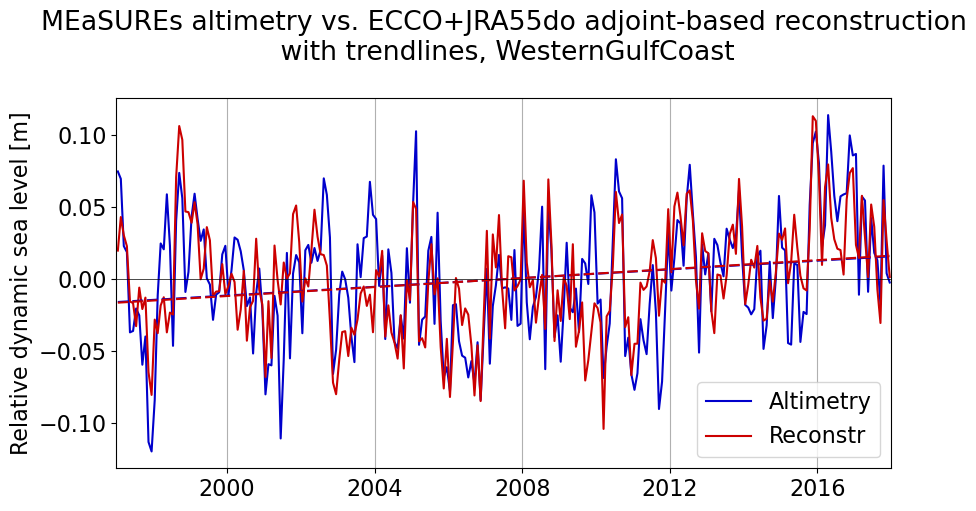

In [52]:
plt.rcParams['font.size'] = 16

fig,ax = plt.subplots(1,1,figsize=(10,5))
h1, = ax.plot(plot_tseries_predtime,\
                ds_forcsens.obs_tseries_sortmonth.values.transpose().flatten(),\
                color=(0,0,.8),label='Altimetry')
h2, = ax.plot(plot_tseries_predtime,\
                ds_forcsens.reconstr_total.values.transpose().flatten(),\
                color=(.8,0,0),label='Reconstr')
ax.plot(plot_tseries_predtime,\
        alt_trendline,color=(0,0,.8),linestyle=(0,(5,2)))
ax.plot(plot_tseries_predtime,\
        reconstr_trendline,color=(.8,0,0),linestyle=(0,(5,2)))
ax.set_ylabel('Relative dynamic sea level [m]')
ax.grid(axis='x')
ax.axhline(y=0,color=(0,0,0),linewidth=0.5)
ax.set_title('MEaSUREs altimetry vs. '+case_id.replace('_','+')+' adjoint-based reconstruction\n with trendlines, '+place_id+'\n')
ax.set_xlim([np.datetime64(str(years_to_predict[0])+'-01-01','ns'),\
             np.datetime64(str(years_to_predict[-1]+1)+'-01-01','ns')])
ax.legend(handles=[h1,h2])
plt.subplots_adjust(top=0.85)
plt.savefig('RSL_tseries_altim_'+case_id+'_reconstr_with_trendlines_'+place_id+'_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

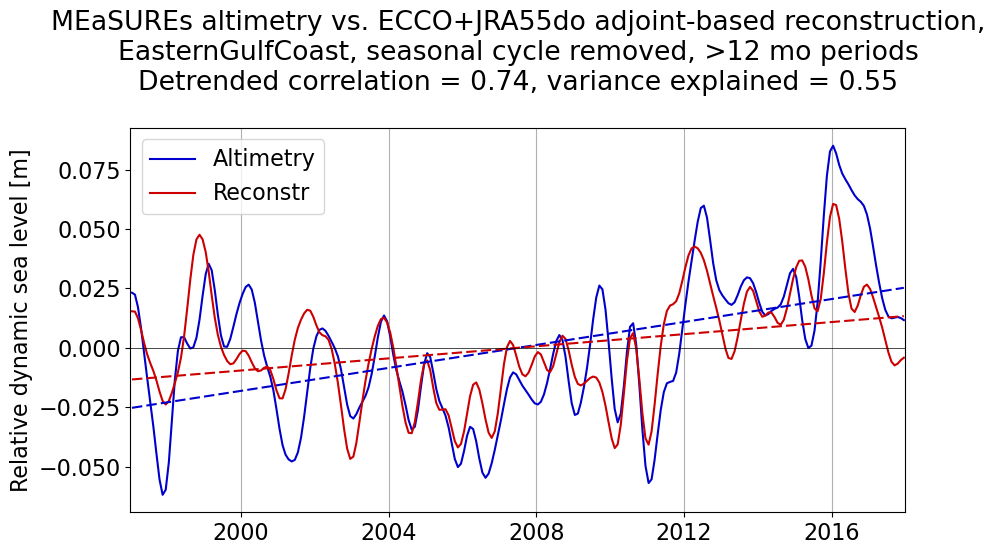

In [6]:
corr_coeff_zerolag = corr_zerolag(reconstr_IA,\
                                  alt_IA)

curr_mask = nanmask_create((reconstr_IA - reconstr_trendline) + (alt_IA - alt_trendline))
curr_varexp = 1 - (var_compute(np.where(curr_mask,(reconstr_IA - reconstr_trendline)\
                                                    - (alt_IA - alt_trendline),np.nan),axis=-1)/\
                   var_compute(np.where(curr_mask,alt_IA - alt_trendline,np.nan),axis=-1))

plt.rcParams['font.size'] = 16

fig,ax = plt.subplots(1,1,figsize=(10,6))
h1, = ax.plot(plot_tseries_predtime,\
            alt_IA,color=(0,0,.8),label='Altimetry')
h2, = ax.plot(plot_tseries_predtime,\
             reconstr_IA,color=(.8,0,0),label='Reconstr')
ax.plot(plot_tseries_predtime,\
        alt_trendline,color=(0,0,.8),linestyle=(0,(5,2)))
ax.plot(plot_tseries_predtime,\
        reconstr_trendline,color=(.8,0,0),linestyle=(0,(5,2)))
ax.set_ylabel('Relative dynamic sea level [m]')
ax.grid(axis='x')
ax.axhline(y=0,color=(0,0,0),linewidth=0.5)
ax.set_title('MEaSUREs altimetry vs. '+case_id.replace('_','+')+' adjoint-based reconstruction,\n'\
             +place_id+', seasonal cycle removed, >12 mo periods\n'\
             +'Detrended correlation = '+str(.01*np.round(corr_coeff_zerolag/.01))[:4]\
             +', variance explained = '+str(.01*np.round(curr_varexp/.01))[:4]+'\n')
ax.set_xlim([np.datetime64(str(years_to_predict[0])+'-01-01','ns'),\
             np.datetime64(str(years_to_predict[-1]+1)+'-01-01','ns')])
ax.legend(handles=[h1,h2])
plt.subplots_adjust(top=0.75)
plt.savefig('RSL_tseries_altim_'+case_id+'_reconstr_12molp_'+place_id+'_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

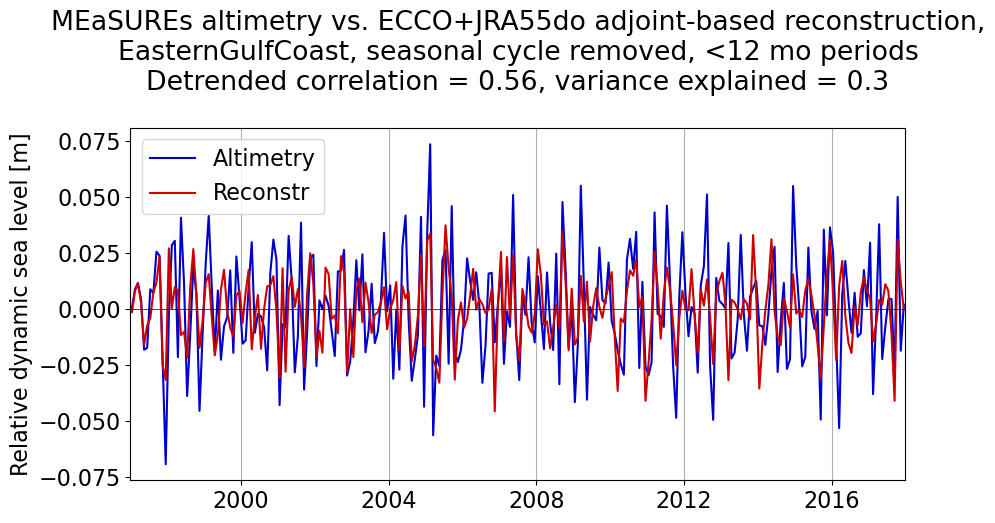

In [7]:
alt_subannual = ds_forcsens.obs_tseries_sortmonth.values.transpose().flatten() - alt_IA
reconstr_subannual = ds_forcsens.reconstr_total.values.transpose().flatten() - reconstr_IA

corr_coeff_zerolag = corr_zerolag(reconstr_subannual,\
                                  alt_subannual)

curr_mask = nanmask_create(reconstr_subannual + alt_subannual)
curr_varexp = 1 - (var_compute(np.where(curr_mask,reconstr_subannual\
                                                    - alt_subannual,np.nan),axis=-1)/\
                   var_compute(np.where(curr_mask,alt_subannual,np.nan),axis=-1))


fig,ax = plt.subplots(1,1,figsize=(10,5.5))
h1, = ax.plot(plot_tseries_predtime,\
              alt_subannual,\
              color=(0,0,.8),label='Altimetry')
h2, = ax.plot(plot_tseries_predtime,\
              reconstr_subannual,\
              color=(.8,0,0),label='Reconstr')
# ax.plot(plot_tseries_predtime,\
#         alt_trendline,color=(0,0,.8),linestyle=(0,(5,2)))
# ax.plot(plot_tseries_predtime,\
#         reconstr_trendline,color=(.8,0,0),linestyle=(0,(5,2)))
ax.set_ylabel('Relative dynamic sea level [m]')
ax.grid(axis='x')
ax.axhline(y=0,color=(0,0,0),linewidth=0.5)
ax.set_title('MEaSUREs altimetry vs. '+case_id.replace('_','+')+' adjoint-based reconstruction,\n'\
             +place_id+', seasonal cycle removed, <12 mo periods\n'\
             +'Detrended correlation = '+str(.01*np.round(corr_coeff_zerolag/.01))[:4]\
             +', variance explained = '+str(.01*np.round(curr_varexp/.01))[:4]+'\n')
ax.set_xlim([np.datetime64(str(years_to_predict[0])+'-01-01','ns'),\
             np.datetime64(str(years_to_predict[-1]+1)+'-01-01','ns')])
ax.legend(handles=[h1,h2])
plt.subplots_adjust(top=0.75)
plt.savefig('RSL_tseries_altim_'+case_id+'_reconstr_12mohp_'+place_id+'_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

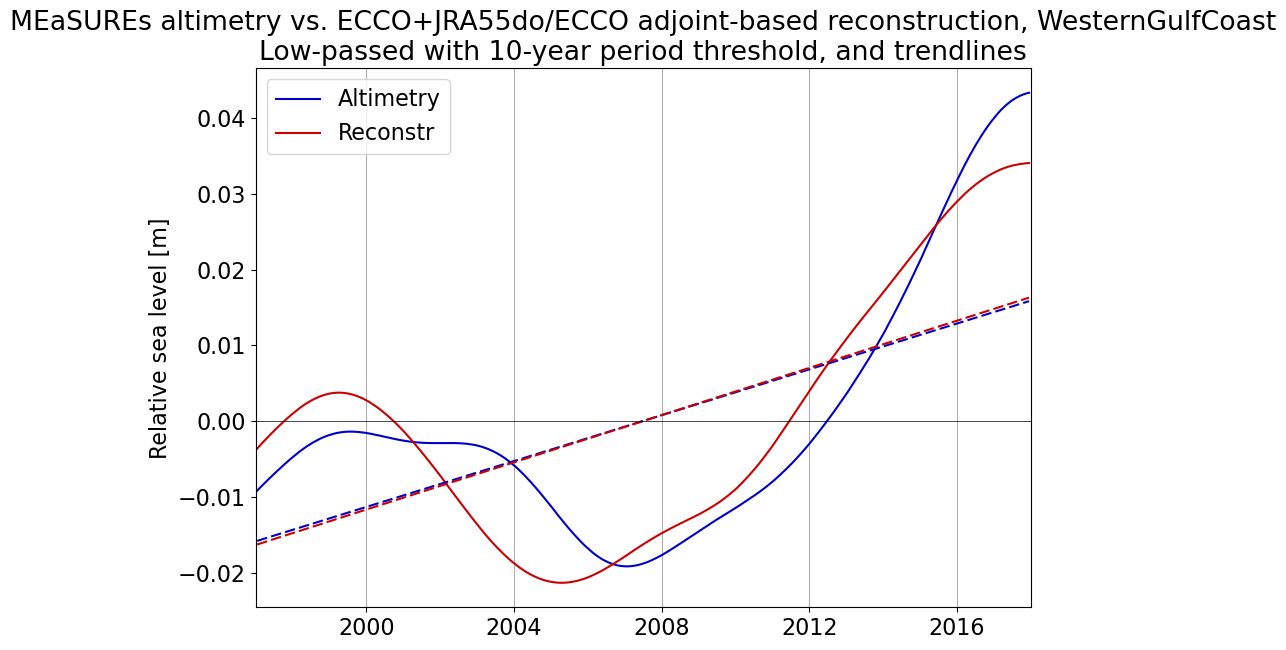

In [55]:
alt_10yrlp,alt_trendline = bandpass_err_fcn(ds_forcsens.obs_tseries_sortmonth.values.transpose().flatten(),\
                                    axis=-1,delta_dim=365.24/12,high_bound=1/(10*365.24),power_cutoff_opt=1,\
                                    steepness_factor=2,trend_handling_opt=1,uneven_edge_handling_opt=0)
reconstr_10yrlp,reconstr_trendline = bandpass_err_fcn(ds_forcsens.reconstr_total.values.transpose().flatten(),\
                                    axis=-1,delta_dim=365.24/12,high_bound=1/(10*365.24),power_cutoff_opt=1,\
                                    steepness_factor=2,trend_handling_opt=1,uneven_edge_handling_opt=0)

fig,ax = plt.subplots(1,1,figsize=(10,7))
h1, = ax.plot(plot_tseries_predtime,\
            alt_10yrlp,color=(0,0,.8),label='Altimetry')
h2, = ax.plot(plot_tseries_predtime,\
             reconstr_10yrlp,color=(.8,0,0),label='Reconstr')
ax.plot(plot_tseries_predtime,\
        alt_trendline,color=(0,0,.8),linestyle=(0,(5,2)))
ax.plot(plot_tseries_predtime,\
        reconstr_trendline,color=(.8,0,0),linestyle=(0,(5,2)))
ax.set_ylabel('Relative sea level [m]')
ax.grid(axis='x')
ax.axhline(y=0,color=(0,0,0),linewidth=0.5)
ax.set_title('MEaSUREs altimetry vs. '+case_id.replace('_','+')+'/ECCO adjoint-based reconstruction, '+place_id+'\n'\
             'Low-passed with 10-year period threshold, and trendlines')
ax.set_xlim([np.datetime64(str(years_to_predict[0])+'-01-01','ns'),\
             np.datetime64(str(years_to_predict[-1]+1)+'-01-01','ns')])
ax.legend(handles=[h1,h2])
plt.savefig('RSL_tseries_altim_'+case_id+'_reconstr_10yrlp_'+place_id+'_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

In [5]:
# variance explained by frequency ranges

# freq_thresholds = np.array([1/48,12/(6*365.24),1/365.24,1/(3*365.24),1/(10*365.24),1/(45*365.24)])
# freq_range_names = ['2-6 mo','6-12 mo','1-3 yr','3-10 yr','10-'+str(ds_forcsens.sizes['pred_year'])+' yr','Trend']
# freq_range_names = ['2-6 mo','6-12 mo','1-3 yr','3-10 yr','10-'+str(ds_forcsens.sizes['pred_year'])+' yr']
# freq_thresholds = np.array([1/48,1/365.24,1/(45*365.24)])
# freq_range_names = ['2-12 mo','1-'+str(ds_forcsens.sizes['pred_year'])+' yr']
# freq_thresholds = np.array([1/48,1/365.24,1/(10*365.24),1/(45*365.24)])
# freq_range_names = ['2-12 mo','1-10 yr','10-'+str(ds_forcsens.sizes['pred_year'])+' yr']
freq_thresholds = np.array([1/48,1/365.24,1/(10*365.24)])
freq_range_names = ['2-12 mo','1-10 yr']


edge_handling_opt = 0


region_names = ['Mississippi','East Gulf','West Gulf','Caribbean','Atl 5-25N',\
                'FL Straits','US Atl coast','Atl 25-35N','Atl 35-45N','Atl 45-55N','Atl 55-70N']
n_regions = len(region_names)

In [6]:
regions_impacts = np.reshape(np.moveaxis(ds_forcsens.preinit_cell_impact_attimes\
                                         .sum(['forc','sens_tval']).values,(2,1,0),(0,1,2)),\
                             (ds_forcsens.sizes['cell'],-1))
regions_impacts_byforc = np.reshape(np.moveaxis(ds_forcsens.preinit_cell_impact_attimes\
                                         .sum('sens_tval').values,(3,0,2,1),(0,1,2,3)),\
                             (ds_forcsens.sizes['cell'],ds_forcsens.sizes['forc'],-1))

def nanmask_create(array):
    mask = np.logical_and(np.logical_and(~np.isnan(array),~np.isinf(array)),np.abs(array) >= 1.e-15)
    
    return mask


def tseries_bp_in_freq_range(ds_forcsens,regions_impacts,high_freq_bound,low_freq_bound,edge_handling_opt):
    obs_bp,obs_trendline = bandpass_err_fcn(ds_forcsens.obs_tseries_sortmonth.values.transpose().flatten(),\
                                            axis=-1,delta_dim=365.24/12,\
                                            low_bound=low_freq_bound,\
                                            high_bound=high_freq_bound,\
                                            power_cutoff_opt=1,steepness_factor=2,\
                                            trend_handling_opt=0,\
                                            edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
    reconstr_bp,reconstr_trendline = bandpass_err_fcn(ds_forcsens.reconstr_total.values.transpose().flatten(),\
                                            axis=-1,delta_dim=365.24/12,\
                                            low_bound=low_freq_bound,\
                                            high_bound=high_freq_bound,\
                                            power_cutoff_opt=1,steepness_factor=2,\
                                            trend_handling_opt=0,\
                                            edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
    regions_bp,regions_trendline = bandpass_err_fcn(regions_impacts[:n_regions,:],\
                                                    axis=-1,delta_dim=365.24/12,\
                                                    low_bound=low_freq_bound,\
                                                    high_bound=high_freq_bound,\
                                                    power_cutoff_opt=1,steepness_factor=2,\
                                                    trend_handling_opt=0,\
                                                    edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
        
    # by forcing type
    reconstr_byforc_bp,reconstr_byforc_trendline = bandpass_err_fcn(np.reshape(np.moveaxis(\
                                                               ds_forcsens.all_impact_forc_attimes.values,2,1),\
                                                                               (ds_forcsens.sizes['forc'],-1)),\
                                                        axis=-1,delta_dim=365.24/12,\
                                                        low_bound=freq_thresholds[curr_range_num+1],\
                                                        high_bound=freq_thresholds[curr_range_num],\
                                                        power_cutoff_opt=1,steepness_factor=2,\
                                                        trend_handling_opt=0,\
                                                        edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
    regions_byforc_bp,regions_byforc_trendline = bandpass_err_fcn(regions_impacts_byforc[:n_regions,:,:],\
                                                    axis=-1,delta_dim=365.24/12,\
                                                    low_bound=freq_thresholds[curr_range_num+1],\
                                                    high_bound=freq_thresholds[curr_range_num],\
                                                    power_cutoff_opt=1,steepness_factor=2,\
                                                    trend_handling_opt=0,\
                                                    edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
        
    outputs = dict()
    outputs['obs_bp'] = obs_bp
    outputs['obs_trendline'] = obs_trendline
    outputs['reconstr_bp'] = reconstr_bp
    outputs['reconstr_trendline'] = reconstr_trendline
    outputs['regions_bp'] = regions_bp
    outputs['regions_trendline'] = regions_trendline
    outputs['reconstr_byforc_bp'] = reconstr_byforc_bp
    outputs['reconstr_byforc_trendline'] = reconstr_byforc_trendline
    outputs['regions_byforc_bp'] = regions_byforc_bp
    outputs['regions_byforc_trendline'] = regions_byforc_trendline
        
    return outputs



ref_stddev_infreq_range = np.empty((1,len(freq_range_names)))
regions_reconstr_stddev_infreq_range = np.empty((n_regions+1,len(freq_range_names)))
frac_varexp_infreq_range = np.empty((n_regions+1,len(freq_range_names)))
regions_reconstr_stddev_byforc_infreq_range = np.empty((n_regions+1,ds_forcsens.sizes['forc'],len(freq_range_names)))
frac_varexp_byforc_infreq_range = np.empty((n_regions+1,ds_forcsens.sizes['forc'],len(freq_range_names)))
for curr_range_num in range(len(freq_range_names)):
    if freq_range_names[curr_range_num] == 'Trend':
        if varexp_type == 'reconstr':
            ref_trendline = outputs['reconstr_trendline']
        else:
            ref_trendline = outputs['obs_trendline']
        regions_reconstr_trendline = np.append(outputs['regions_trendline'],\
                                               np.expand_dims(outputs['reconstr_trendline'],axis=0),axis=0)
        ref_trendline = np.tile(np.expand_dims(ref_trendline,axis=0),(n_regions+1,1))
        curr_mask = nanmask_create(regions_reconstr_trendline)
        curr_mask = np.logical_and(curr_mask,nanmask_create(ref_trendline)).astype('int64')
        ref_trendline -= np.nansum(curr_mask*ref_trendline,axis=-1,keepdims=True)\
                                /np.nansum(curr_mask,axis=-1,keepdims=True)
        regions_reconstr_trendline -= np.nansum(curr_mask*regions_reconstr_trendline,\
                                                axis=-1,keepdims=True)\
                                        /np.nansum(curr_mask,axis=-1,keepdims=True)
        ref_stddev_infreq_range[0,curr_range_num] = (np.nansum(curr_mask\
                                                               *(ref_trendline**2),axis=-1)/\
                                                     np.nansum(curr_mask,axis=-1))[-1]**(1/2)
        regions_reconstr_stddev_infreq_range[:,curr_range_num] = \
                        (np.nansum(curr_mask*(regions_reconstr_trendline**2),axis=-1)/\
                         np.nansum(curr_mask,axis=-1))**(1/2)
        frac_varexp_infreq_range[:,curr_range_num] = \
                    1 - (np.nansum(curr_mask\
                                   *((ref_trendline - regions_reconstr_trendline)**2),axis=-1)/\
                         np.nansum(curr_mask*(ref_trendline**2),axis=-1))
        
        # by forcing type
        regions_reconstr_byforc_trendline = np.append(outputs['regions_byforc_trendline'],\
                                                      np.expand_dims(outputs['reconstr_byforc_trendline'],axis=0),axis=0)
        # obs_trendline = np.tile(np.expand_dims(outputs['obs_trendline'],axis=1),(1,ds_forcsens.sizes['forc'],1))
        curr_mask = nanmask_create(regions_reconstr_byforc_trendline)
        ref_trendline = np.tile(np.expand_dims(ref_trendline,axis=1),(1,4,1))
        curr_mask = np.logical_and(curr_mask,nanmask_create(ref_trendline)).astype('int64')
        ref_trendline -= np.nansum(curr_mask*ref_trendline,axis=-1,keepdims=True)\
                                /np.nansum(curr_mask,axis=-1,keepdims=True)
        regions_reconstr_byforc_trendline -= np.nansum(curr_mask*regions_reconstr_byforc_trendline,\
                                                axis=-1,keepdims=True)\
                                        /np.nansum(curr_mask,axis=-1,keepdims=True)
        regions_reconstr_stddev_byforc_infreq_range[:,:,curr_range_num] = \
                        (np.nansum(curr_mask*(regions_reconstr_byforc_trendline**2),axis=-1)/\
                         np.nansum(curr_mask,axis=-1))**(1/2)
        frac_varexp_byforc_infreq_range[:,:,curr_range_num] = \
                    1 - (np.nansum(curr_mask\
                                   *((ref_trendline - regions_reconstr_byforc_trendline)**2),axis=-1)/\
                         np.nansum(curr_mask*(ref_trendline**2),axis=-1))
    else:
        outputs = tseries_bp_in_freq_range(ds_forcsens,regions_impacts,\
                                           high_freq_bound=freq_thresholds[curr_range_num],\
                                           low_freq_bound=freq_thresholds[curr_range_num+1],\
                                           edge_handling_opt=edge_handling_opt)

        if varexp_type == 'reconstr':
            ref_bp = outputs['reconstr_bp']
        else:
            ref_bp = outputs['obs_bp']
        regions_reconstr_bp = np.append(outputs['regions_bp'],np.expand_dims(outputs['reconstr_bp'],axis=0),axis=0)
        ref_bp = np.tile(np.expand_dims(ref_bp,axis=0),(n_regions+1,1))
        curr_mask = nanmask_create(regions_reconstr_bp)
        curr_mask = np.logical_and(curr_mask,nanmask_create(ref_bp))\
                        .astype('int64')
        ref_bp -= np.nansum(curr_mask*ref_bp,axis=-1,keepdims=True)\
                        /np.nansum(curr_mask,axis=-1,keepdims=True)
        regions_reconstr_bp -= np.nansum(curr_mask*regions_reconstr_bp,axis=-1,keepdims=True)\
                                /np.nansum(curr_mask,axis=-1,keepdims=True)
        ref_stddev_infreq_range[0,curr_range_num] = (np.nansum(curr_mask*(ref_bp**2),axis=-1)/\
                                                     np.nansum(curr_mask,axis=-1))[-1]**(1/2)
        regions_reconstr_stddev_infreq_range[:,curr_range_num] = \
                        (np.nansum(curr_mask*(regions_reconstr_bp**2),axis=-1)/\
                         np.nansum(curr_mask,axis=-1))**(1/2)
        frac_varexp_infreq_range[:,curr_range_num] = \
                    1 - (np.nansum(curr_mask*((ref_bp - regions_reconstr_bp)**2),axis=-1)/\
                         np.nansum(curr_mask*(ref_bp**2),axis=-1))
        
        regions_reconstr_byforc_bp = np.append(outputs['regions_byforc_bp'],\
                                                      np.expand_dims(outputs['reconstr_byforc_bp'],axis=0),axis=0)
        # obs_bp = np.tile(np.expand_dims(outputs['obs_bp'],axis=(0,1)),\
        #                  (regions_reconstr_byforc_bp.shape[0],ds_forcsens.sizes['forc'],1))
        curr_mask = nanmask_create(regions_reconstr_byforc_bp)
        ref_bp = np.tile(np.expand_dims(ref_bp,axis=1),(1,4,1))
        curr_mask = np.logical_and(curr_mask,nanmask_create(ref_bp)).astype('int64')
        ref_bp -= np.nansum(curr_mask*ref_bp,axis=-1,keepdims=True)\
                                /np.nansum(curr_mask,axis=-1,keepdims=True)
        regions_reconstr_byforc_bp -= np.nansum(curr_mask*regions_reconstr_byforc_bp,\
                                                axis=-1,keepdims=True)\
                                        /np.nansum(curr_mask,axis=-1,keepdims=True)
        regions_reconstr_stddev_byforc_infreq_range[:,:,curr_range_num] = \
                        (np.nansum(curr_mask*(regions_reconstr_byforc_bp**2),axis=-1)/\
                         np.nansum(curr_mask,axis=-1))**(1/2)
        frac_varexp_byforc_infreq_range[:,:,curr_range_num] = \
                    1 - (np.nansum(curr_mask\
                                   *((ref_bp - regions_reconstr_byforc_bp)**2),axis=-1)/\
                         np.nansum(curr_mask*(ref_bp**2),axis=-1))

C:\Users\adelman\Documents\py_functions\filter_functions.py:45: RuntimeWarning: divide by zero encountered in log
  bandpass_filter = 0.5*(special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(low_bound/half_power_adj))) - special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(high_bound*half_power_adj))))


In [7]:
def var_compute(array,axis):
    mask = nanmask_create(array)
    array -= (np.nansum(mask*array,axis=axis,keepdims=True)/\
              np.nansum(mask,axis=axis,keepdims=True))
    array_var = np.nansum(mask*(array**2),axis=axis)/np.nansum(mask,axis=axis)

    return array_var


# freq_thresholds = np.array([1/48,1/365.24,1/(5*365.24),1/(45*365.24)])
# freq_range_names = ['2-12 mo','1-5 yr','5-'+str(ds_forcsens.sizes['pred_year'])+' yr']

n_regions = len(region_names)
curr_range_num = 0

outputs = tseries_bp_in_freq_range(ds_forcsens,regions_impacts,\
                                   high_freq_bound=freq_thresholds[curr_range_num],\
                                   low_freq_bound=freq_thresholds[curr_range_num+1],\
                                   edge_handling_opt=edge_handling_opt)

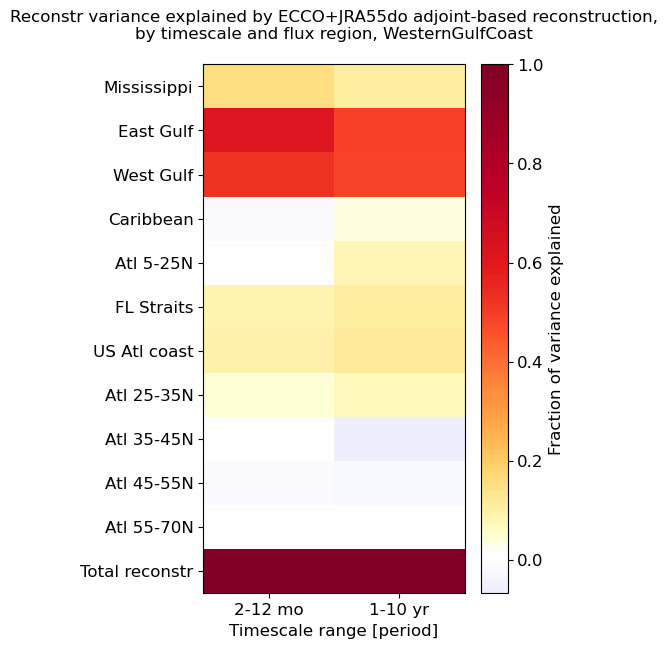

In [5]:
# plot variance explained by region and frequency range

if varexp_type == 'reconstr':
    varexp_title_id = 'Reconstr'
elif varexp_type == 'altim':
    varexp_title_id = 'Altimetry'
elif varexp_type == 'tgauge':
    varexp_title_id = 'Tide gauge'

def cmap_scaled_varexp(array_to_plot):
    import matplotlib as mpl
    import matplotlib.colors as colors
    from matplotlib.colors import LinearSegmentedColormap,ListedColormap

    colorscale_min = np.nanmin(array_to_plot)
    colorscale_max = 1

    neg_pos_ratio = np.abs(colorscale_min)/np.abs(colorscale_max)

    curr_cmap = mpl.colormaps['bwr'].resampled(262)
    cmap_part1 = np.asarray(curr_cmap(range(int(np.round(131-(131*neg_pos_ratio))),132)))
    curr_cmap = mpl.colormaps['YlOrRd'].resampled(256)
    cmap_part2 = np.asarray(curr_cmap(np.concatenate((np.arange(0,60,4),np.arange(60,120,3),np.arange(120,184,2),\
                                              np.arange(184,220,1.5),np.arange(220,256,1)))/256))
    cmap_taper_part2 = (np.reshape(np.arange(0.8,0,-0.2),(-1,1))*cmap_part1[[-1],:])\
                            + (np.reshape(np.arange(0.2,1,0.2),(-1,1))*cmap_part2[[0],:])
    cmap_taper_part2[cmap_taper_part2 > 1] = 1
    full_cmap = ListedColormap(np.vstack((cmap_part1,\
                                          cmap_part1[-1,:],\
                                          cmap_taper_part2,\
                                          cmap_part2)))
    
    return colorscale_min,colorscale_max,full_cmap


curr_vmin,curr_vmax,curr_cmap = cmap_scaled_varexp(frac_varexp_infreq_range)

plt.rcParams['font.size'] = 12
# fig,ax = plt.subplots(1,1,figsize=(10,7))
# fig,ax = plt.subplots(1,1,figsize=(7,7))
fig,ax = plt.subplots(1,1,figsize=(5.5,7))
plt.tight_layout(rect=(.15,.05,.9,.9))
# curr_plot = ax.pcolormesh(np.arange(0,len(freq_range_names)),np.arange(0,n_regions+1),\
#                                     frac_varexp_infreq_range,cmap=curr_cmap,vmin=curr_vmin,vmax=curr_vmax)
curr_plot = ax.pcolormesh(np.arange(0,len(freq_range_names)),np.arange(0,n_regions+1),\
                                    frac_varexp_infreq_range,cmap=curr_cmap,vmin=curr_vmin,vmax=curr_vmax)
ax.set_ylim(ax.get_ylim()[::-1])
# ax.xaxis.set_ticks(ticks=np.arange(0,len(freq_range_names)),labels=freq_range_names)
ax.xaxis.set_ticks(ticks=np.arange(0,len(freq_range_names)),labels=freq_range_names)
ax.yaxis.set_ticks(ticks=np.arange(0,n_regions+1),labels=region_names+['Total reconstr'])
ax.set_xlabel('Timescale range [period]')
ax.set_title(varexp_title_id+' variance explained by '+case_id.replace('_','+')+' adjoint-based reconstruction,\n'\
             +'by timescale and flux region, '+place_id+'\n',\
             fontsize=12)
curr_cbar = plt.colorbar(curr_plot)
curr_cbar.set_label('Fraction of variance explained')
if np.abs(edge_handling_opt) < 1.e-5:
    edge_masked_str = ''
else:
    edge_masked_str = '_edgemasked'
if 'Trend' in freq_range_names:
    plt.savefig('Varexp_regions_byfreq_'+case_id+'_'+varexp_type+'_'+place_id+'_'\
                    'allmonths_'+year_range_id+'.png')
else:
#     plt.savefig('Varexp_regions_byfreq_notrend_'+case_id+'_'+varexp_type+'_'+place_id+'_'\
#                     'allmonths_'+year_range_id+'.png')
    # plt.savefig('Varexp_regions_byfreq'+edge_masked_str+'_notrend_consolid_'+case_id+'_'+varexp_type+'_'\
    #             +place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
    plt.savefig('Varexp_regions_byfreq'+edge_masked_str+'_notrend_nodecadal_consolid_'+case_id+'_'+varexp_type+'_'\
                +place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

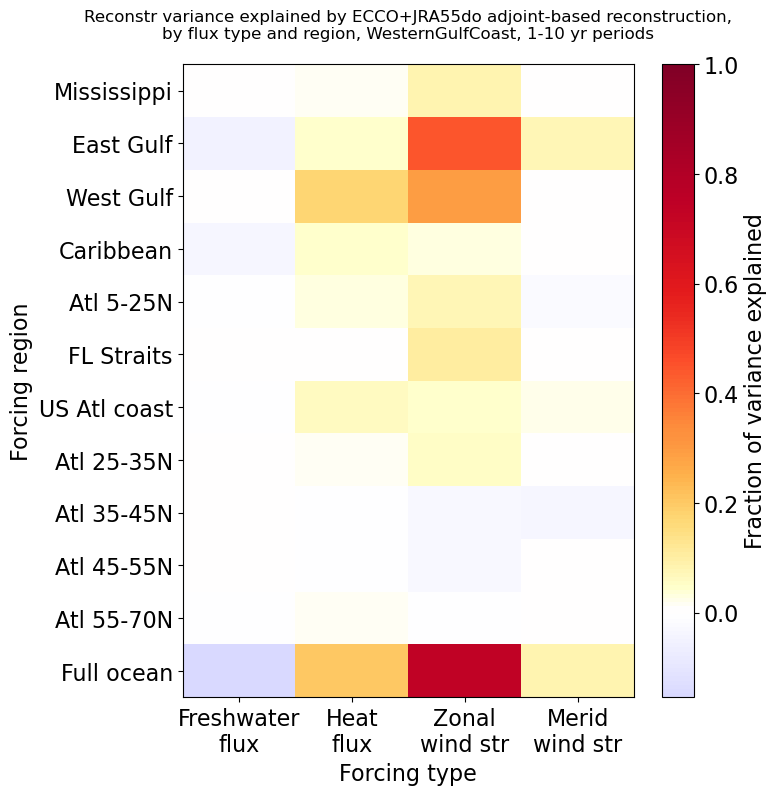

In [7]:
# plot variance explained by region and forcing type, in a given frequency range

# range_to_plot = '2-12 mo'
range_to_plot = '1-10 yr'
# range_to_plot = '10-'+str(ds_forcsens.sizes['pred_year'])+' yr'
# range_to_plot = 'Trend'
curr_freq_ind = freq_range_names.index(range_to_plot)

def cmap_scaled_varexp(array_to_plot):
    import matplotlib as mpl
    import matplotlib.colors as colors
    from matplotlib.colors import LinearSegmentedColormap,ListedColormap

    colorscale_min = np.nanmin(array_to_plot)
    colorscale_max = 1

    neg_pos_ratio = np.abs(colorscale_min)/np.abs(colorscale_max)

    curr_cmap = mpl.colormaps['bwr'].resampled(262)
    cmap_part1 = np.asarray(curr_cmap(range(int(np.round(131-(131*neg_pos_ratio))),132)))
    curr_cmap = mpl.colormaps['YlOrRd'].resampled(256)
    cmap_part2 = np.asarray(curr_cmap(np.concatenate((np.arange(0,60,4),np.arange(60,120,3),np.arange(120,184,2),\
                                              np.arange(184,220,1.5),np.arange(220,256,1)))/256))
    cmap_taper_part2 = (np.reshape(np.arange(0.8,0,-0.2),(-1,1))*cmap_part1[[-1],:])\
                            + (np.reshape(np.arange(0.2,1,0.2),(-1,1))*cmap_part2[[0],:])
    cmap_taper_part2[cmap_taper_part2 > 1] = 1
    full_cmap = ListedColormap(np.vstack((cmap_part1,\
                                          cmap_part1[-1,:],\
                                          cmap_taper_part2,\
                                          cmap_part2)))
    
    return colorscale_min,colorscale_max,full_cmap


curr_vmin,curr_vmax,curr_cmap = cmap_scaled_varexp(frac_varexp_byforc_infreq_range[:,:,curr_freq_ind])

plt.rcParams['font.size'] = 16
fig,ax = plt.subplots(1,1,figsize=(9,8.5))
plt.tight_layout(rect=(.15,.05,.9,.9))
curr_plot = ax.pcolormesh(np.arange(0,ds_forcsens.sizes['forc']),np.arange(0,n_regions+1),\
                                    frac_varexp_byforc_infreq_range[:,:,curr_freq_ind],\
                          cmap=curr_cmap,vmin=curr_vmin,vmax=curr_vmax)
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.set_ticks(ticks=np.arange(0,ds_forcsens.sizes['forc']),\
                   labels=['Freshwater\nflux','Heat\nflux','Zonal\nwind str','Merid\nwind str'])
ax.yaxis.set_ticks(ticks=np.arange(0,n_regions+1),labels=region_names+['Full ocean'])
ax.set_xlabel('Forcing type')
ax.set_ylabel('Forcing region')
ax.set_title(varexp_title_id+' variance explained by '+case_id.replace('_','+')+' adjoint-based reconstruction,\n'\
             'by flux type and region, '+place_id+', '+range_to_plot+' periods\n',fontsize=12)
curr_cbar = plt.colorbar(curr_plot)
curr_cbar.set_label('Fraction of variance explained')
if np.abs(edge_handling_opt) < 1.e-5:
    edge_masked_str = ''
else:
    edge_masked_str = '_edgemasked'
plt.savefig('Varexp_regions_byforc_'+range_to_plot.replace(' ','')+edge_masked_str+'_'+case_id+'_'+varexp_type+'_'\
            +place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

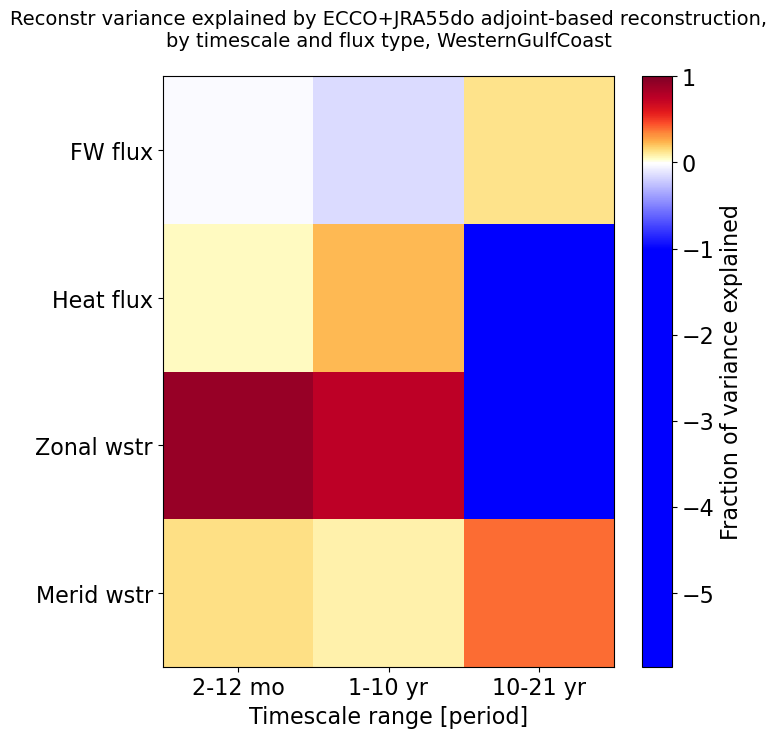

In [64]:
curr_vmin,curr_vmax,curr_cmap = cmap_scaled_varexp(frac_varexp_byforc_infreq_range[-1,:,:])

plt.rcParams['font.size'] = 16
fig,ax = plt.subplots(1,1,figsize=(9,8))
plt.tight_layout(rect=(.15,.05,.9,.9))
curr_plot = ax.pcolormesh(np.arange(0,len(freq_range_names)),np.arange(0,ds_forcsens.sizes['forc']),\
                                    frac_varexp_byforc_infreq_range[-1,:,:],\
                          cmap=curr_cmap,vmin=curr_vmin,vmax=curr_vmax)
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.set_ticks(ticks=np.arange(0,len(freq_range_names)),labels=freq_range_names)
ax.yaxis.set_ticks(ticks=np.arange(0,ds_forcsens.sizes['forc']),\
                   labels=['FW flux','Heat flux','Zonal wstr','Merid wstr'])
ax.set_xlabel('Timescale range [period]')
ax.set_title(varexp_title_id+' variance explained by '+case_id.replace('_','+')+' adjoint-based reconstruction,\n'\
             'by timescale and flux type, '+place_id+'\n',fontsize=14)
curr_cbar = plt.colorbar(curr_plot)
curr_cbar.set_label('Fraction of variance explained')
if np.abs(edge_handling_opt) < 1.e-5:
    edge_masked_str = ''
else:
    edge_masked_str = '_edgemasked'
plt.savefig('Varexp_byfreq'+edge_masked_str+'_byforc_'+range_to_plot.replace(' ','')+edge_masked_str+'_'\
            +case_id+'_'+varexp_type+'_'\
            +place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

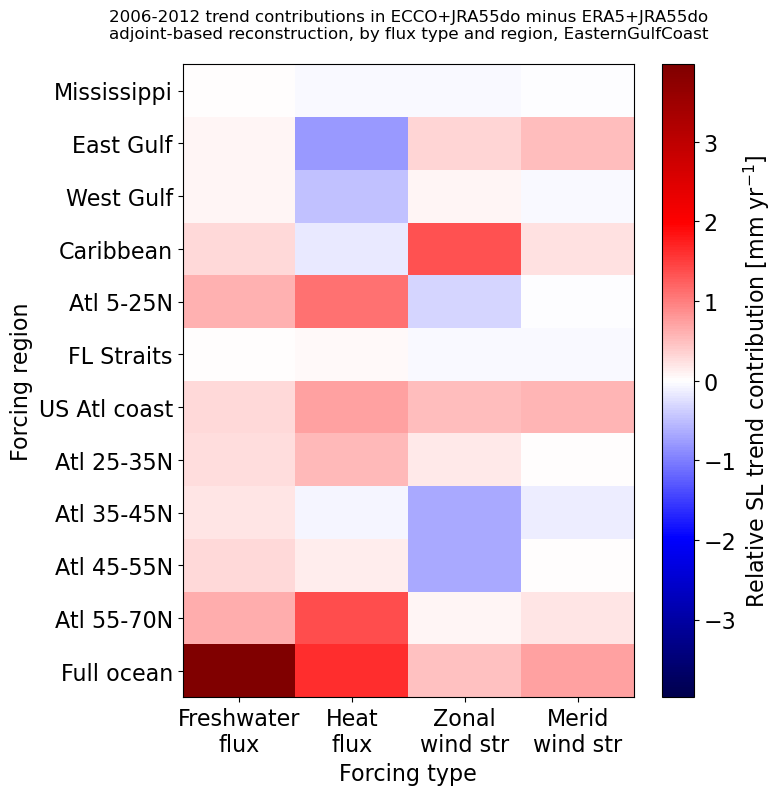

In [2]:
# plot trend contribution by region and forcing type

# maps of contributions to trend

trend_year_first = 2006
trend_year_last = 2012

trend_year_range_id = str(trend_year_first)+'_'+str(trend_year_last)


plot_tseries_predtime = ds_forcsens.pred_time.values.transpose().flatten()
in_trend_range_ind = np.logical_and(plot_tseries_predtime >= np.datetime64(str(trend_year_first)+'-01-01','ns'),\
                                    plot_tseries_predtime < np.datetime64(str(trend_year_last+1)+'-01-01','ns'))\
                                    .nonzero()[0]


region_names = ['Mississippi','East Gulf','West Gulf','Caribbean','Atl 5-25N',\
                'FL Straits','US Atl coast','Atl 25-35N','Atl 35-45N','Atl 45-55N','Atl 55-70N']
n_regions = len(region_names)

regions_impacts_byforc = np.reshape(ds_forcsens.preinit_cell_impact_attimes\
                                     .sum('sens_tval').transpose('cell','forc','pred_year','pred_month').values,\
                             (ds_forcsens.sizes['cell'],ds_forcsens.sizes['forc'],-1))

regions_byforc_impacts_withall = np.append(regions_impacts_byforc[:n_regions,:,:],\
                                         np.nansum(regions_impacts_byforc,axis=0,keepdims=True),axis=0)

regions_byforc_impacts_trend = trend_compute(regions_byforc_impacts_withall[:,:,in_trend_range_ind],\
                                             axis=-1,delta_dim=1/12).squeeze()

curr_clim = np.nanmax(np.abs(regions_byforc_impacts_trend))

curr_cmap = 'seismic'

plt.rcParams['font.size'] = 16
fig,ax = plt.subplots(1,1,figsize=(9,8.5))
plt.tight_layout(rect=(.15,.05,.9,.9))
curr_plot = ax.pcolormesh(np.arange(0,ds_forcsens.sizes['forc']),np.arange(0,n_regions+1),\
                                    (1.e3)*regions_byforc_impacts_trend,\
                          cmap=curr_cmap,vmin=-(1.e3)*curr_clim,vmax=(1.e3)*curr_clim)
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.set_ticks(ticks=np.arange(0,ds_forcsens.sizes['forc']),\
                   labels=['Freshwater\nflux','Heat\nflux','Zonal\nwind str','Merid\nwind str'])
ax.yaxis.set_ticks(ticks=np.arange(0,n_regions+1),labels=region_names+['Full ocean'])
ax.set_xlabel('Forcing type')
ax.set_ylabel('Forcing region')
if difference_opt:
    case_title_id = case_id_1.replace('_','+')+' minus '+case_id_0.replace('_','+')
    case_file_id = case_id_1+'_minus_'+case_id_0
else:
    case_title_id = case_id.replace('_','+')
    case_file_id = case_id
ax.set_title(trend_year_range_id.replace('_','-')+' trend contributions in '\
             +case_title_id+'\n'\
             +'adjoint-based reconstruction, by flux type and region, '+place_id+'\n',fontsize=12)
curr_cbar = plt.colorbar(curr_plot)
curr_cbar.set_label('Relative SL trend contribution [mm yr$^{-1}$]')
plt.savefig('Trend_regions_byforc_'+case_file_id+'_'+varexp_type+'_'\
            +place_id+'_allmonths_'+maxlead_id+'lead_'+trend_year_range_id+'.png')
plt.show()

In [45]:
# variance explained by frequency range and lead time

freq_thresholds = np.array([1/48,1/365.24,1/(45*365.24)])
freq_range_names = ['2-12 mo','1-'+str(ds_forcsens.sizes['pred_year'])+' yr']

n_regions = 7

edge_handling_opt = 1

lead_time_thresholds = (np.array([(25*365.24),(1*365.24),\
                                  (6*(365.24/12)),(1*(365.24/12)),7,(-1*(365.24/12))])\
                            *(8.64e13)).astype('int64').astype('timedelta64[ns]')
lead_time_names = ['1 yr','6 mo','1 mo','1 wk','Reconstr']


def nanmask_create(array):
    mask = np.logical_and(np.logical_and(~np.isnan(array),~np.isinf(array)),np.abs(array) >= 1.e-15)
    
    return mask


sens_pred_times = ds_forcsens.pred_time.sel(pred_year=2004)
inmonth_lead_times = sens_pred_times - ds_forcsens.sens_time.where(\
                            ds_forcsens.sens_time < np.datetime64('2006-01-01','ns'),\
                            ds_forcsens.sens_time + (sens_pred_times - np.datetime64('2015-12-16T12','ns')))

cum_frac_varexp_infreq_range = np.empty((len(lead_time_names),len(freq_range_names)))
cum_frac_varexp_byforc_infreq_range = np.empty((len(lead_time_names),ds_forcsens.sizes['forc'],len(freq_range_names)))
cum_frac_varexp_byregion_infreq_range = np.empty((len(lead_time_names),n_regions,len(freq_range_names)))
for curr_lead_num,cum_lead_threshold in enumerate(lead_time_thresholds[1:]):
    in_cum_lead_mask = (inmonth_lead_times - cum_lead_threshold >= np.timedelta64(0,'ns'))
    cum_impacts_at_curr_lead_byforc_byregion = (in_cum_lead_mask*ds_forcsens.preinit_cell_impact_attimes).sum('sens_tval')\
                                .transpose('forc','pred_month','pred_year','cell')
    cum_impacts_at_curr_lead_byforc = cum_impacts_at_curr_lead_byforc_byregion.sum('cell')\
                                .transpose('forc','pred_month','pred_year')
    cum_impacts_at_curr_lead_byregion = cum_impacts_at_curr_lead_byforc_byregion.sum('forc')\
                                            .transpose('pred_month','pred_year','cell')    

    if varexp_type == 'reconstr':
        ref_tseries = ds_forcsens.reconstr_total.values.transpose().flatten()
    else:
        ref_tseries = ds_forcsens.obs_tseries_sortmonth.values.transpose().flatten()
    
    for curr_range_num in range(len(freq_range_names)):
        ref_bp,_ = bandpass_err_fcn(ref_tseries,\
                                            axis=-1,delta_dim=365.24/12,\
                                            low_bound=freq_thresholds[curr_range_num+1],\
                                            high_bound=freq_thresholds[curr_range_num],\
                                            power_cutoff_opt=1,steepness_factor=2,\
                                            trend_handling_opt=0,\
                                            edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
        cum_impacts_at_curr_lead_byforc_bp,_ = bandpass_err_fcn(np.reshape(\
                                                            np.moveaxis(cum_impacts_at_curr_lead_byforc.values,2,1),\
                                                                            (ds_forcsens.sizes['forc'],-1)),\
                                                        axis=-1,delta_dim=365.24/12,\
                                                        low_bound=freq_thresholds[curr_range_num+1],\
                                                        high_bound=freq_thresholds[curr_range_num],\
                                                        power_cutoff_opt=1,steepness_factor=2,\
                                                        trend_handling_opt=0,\
                                                        edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
        cum_impacts_at_curr_lead_byregion_bp,_ = bandpass_err_fcn(\
                                                        np.reshape(\
                                                                np.moveaxis(cum_impacts_at_curr_lead_byregion\
                                                                    .isel(cell=slice(n_regions)).values,1,0),\
                                                                    (-1,n_regions)),\
                                                        axis=-2,delta_dim=365.24/12,\
                                                        low_bound=freq_thresholds[curr_range_num+1],\
                                                        high_bound=freq_thresholds[curr_range_num],\
                                                        power_cutoff_opt=1,steepness_factor=2,\
                                                        trend_handling_opt=0,\
                                                        edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)

        curr_ref_bp = np.tile(np.expand_dims(ref_bp,axis=0),(ds_forcsens.sizes['forc'],1))
        curr_mask = np.logical_and(nanmask_create(curr_ref_bp),\
                                   nanmask_create(cum_impacts_at_curr_lead_byforc_bp))\
                        .astype('int64')
        curr_ref_bp -= np.nansum(curr_mask*curr_ref_bp,axis=-1,keepdims=True)\
                                /np.nansum(curr_mask,axis=-1,keepdims=True)
        cum_impacts_at_curr_lead_byforc_bp -= np.nansum(curr_mask*cum_impacts_at_curr_lead_byforc_bp,axis=-1,keepdims=True)\
                                        /np.nansum(curr_mask,axis=-1,keepdims=True)
        cum_frac_varexp_infreq_range[curr_lead_num,curr_range_num] = \
                            1 - (np.nansum(curr_mask[0,:]*(\
                                (curr_ref_bp[0,:] - np.nansum(cum_impacts_at_curr_lead_byforc_bp,axis=0))**2),axis=-1)/\
                                 (np.nansum(curr_mask[0,:]*(curr_ref_bp[0,:]**2),axis=-1)))
        cum_frac_varexp_byforc_infreq_range[curr_lead_num,:,curr_range_num] = \
                            1 - (np.nansum((curr_mask*(curr_ref_bp - cum_impacts_at_curr_lead_byforc_bp))**2,axis=-1)/\
                                 (np.nansum((curr_mask*curr_ref_bp)**2,axis=-1)))

        curr_ref_bp = np.tile(np.expand_dims(ref_bp,axis=-1),(1,n_regions))
        curr_mask = np.logical_and(nanmask_create(curr_ref_bp),\
                                   nanmask_create(cum_impacts_at_curr_lead_byregion_bp))\
                        .astype('int64')
        curr_ref_bp -= np.nansum(curr_mask*curr_ref_bp,axis=-2,keepdims=True)\
                                /np.nansum(curr_mask,axis=-2,keepdims=True)
        cum_impacts_at_curr_lead_byregion_bp -= np.nansum(curr_mask*cum_impacts_at_curr_lead_byregion_bp,\
                                                          axis=-2,keepdims=True)\
                                        /np.nansum(curr_mask,axis=-2,keepdims=True)
        cum_frac_varexp_byregion_infreq_range[curr_lead_num,:,curr_range_num] = \
                            1 - (np.nansum((curr_mask*(curr_ref_bp - cum_impacts_at_curr_lead_byregion_bp))**2,axis=-2)/\
                                 (np.nansum((curr_mask*curr_ref_bp)**2,axis=-2)))

C:\Users\adelman\Documents\py_functions\filter_functions.py:45: RuntimeWarning: divide by zero encountered in log
  bandpass_filter = 0.5*(special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(low_bound/half_power_adj))) - special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(high_bound*half_power_adj))))
C:\Users\adelman\Documents\py_functions\filter_functions.py:45: RuntimeWarning: divide by zero encountered in log
  bandpass_filter = 0.5*(special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(low_bound/half_power_adj))) - special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(high_bound*half_power_adj))))
C:\Users\adelman\Documents\py_functions\filter_functions.py:45: RuntimeWarning: divide by zero encountered in log
  bandpass_filter = 0.5*(special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(low_bound/half_power_adj))) - special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(high_bound*half_power_adj))))
C:\Users\adelman\Documents\py_functio

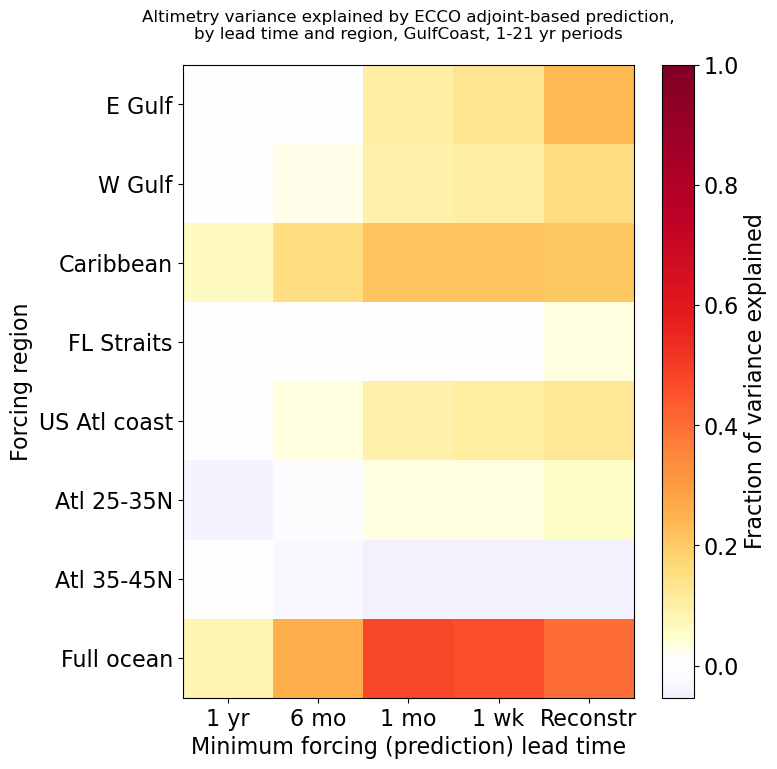

In [47]:
# plot variance explained by region and lead time, in a given frequency range

# range_to_plot = '2-12 mo'
range_to_plot = '1-'+str(ds_forcsens.sizes['pred_year'])+' yr'
# range_to_plot = '1-5 yr'
# range_to_plot = 'Trend'
curr_freq_ind = freq_range_names.index(range_to_plot)

def cmap_scaled_varexp(array_to_plot):
    import matplotlib as mpl
    import matplotlib.colors as colors
    from matplotlib.colors import LinearSegmentedColormap,ListedColormap

    colorscale_min = np.nanmin(array_to_plot)
    colorscale_max = 1

    neg_pos_ratio = np.abs(colorscale_min)/np.abs(colorscale_max)

    curr_cmap = mpl.colormaps['bwr'].resampled(262)
    cmap_part1 = np.asarray(curr_cmap(range(int(np.round(131-(131*neg_pos_ratio))),132)))
    curr_cmap = mpl.colormaps['YlOrRd'].resampled(256)
    cmap_part2 = np.asarray(curr_cmap(np.concatenate((np.arange(0,60,4),np.arange(60,120,3),np.arange(120,184,2),\
                                              np.arange(184,220,1.5),np.arange(220,256,1)))/256))
    cmap_taper_part2 = (np.reshape(np.arange(0.8,0,-0.2),(-1,1))*cmap_part1[[-1],:])\
                            + (np.reshape(np.arange(0.2,1,0.2),(-1,1))*cmap_part2[[0],:])
    cmap_taper_part2[cmap_taper_part2 > 1] = 1
    full_cmap = ListedColormap(np.vstack((cmap_part1,\
                                          cmap_part1[-1,:],\
                                          cmap_taper_part2,\
                                          cmap_part2)))
    
    return colorscale_min,colorscale_max,full_cmap


curr_plot_array = np.concatenate((cum_frac_varexp_byregion_infreq_range[:,:,curr_freq_ind],\
                                                    np.expand_dims(cum_frac_varexp_infreq_range[:,curr_freq_ind],axis=1)),\
                                                   axis=1).transpose()
curr_vmin,curr_vmax,curr_cmap = cmap_scaled_varexp(curr_plot_array)

plt.rcParams['font.size'] = 16
fig,ax = plt.subplots(1,1,figsize=(9,8.5))
plt.tight_layout(rect=(.15,.05,.9,.9))
curr_plot = ax.pcolormesh(np.arange(0,len(lead_time_names)),np.arange(0,n_regions+1),\
                                    curr_plot_array,\
                          cmap=curr_cmap,vmin=curr_vmin,vmax=curr_vmax)
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.set_ticks(ticks=np.arange(0,len(lead_time_names)),labels=lead_time_names)
ax.set_xlabel('Minimum forcing (prediction) lead time')
ax.set_ylabel('Forcing region')
ax.yaxis.set_ticks(ticks=np.arange(0,n_regions+1),labels=region_names+['Full ocean'])
ax.set_title(varexp_title_id+' variance explained by '+case_id.replace('_','+')+' adjoint-based prediction,\n'\
             'by lead time and region, '+place_id+', '+range_to_plot+' periods\n',fontsize=12)
curr_cbar = plt.colorbar(curr_plot)
curr_cbar.set_label('Fraction of variance explained')
if np.abs(edge_handling_opt) < 1.e-5:
    edge_masked_str = ''
else:
    edge_masked_str = '_edgemasked'
plt.savefig('Varexp_regions_bylead_'+range_to_plot.replace(' ','')+edge_masked_str+'_'+case_id+'_'+varexp_type+'_'\
            +place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

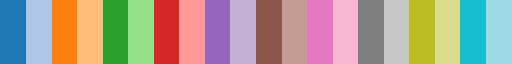

In [16]:
mpl.colormaps['tab20']

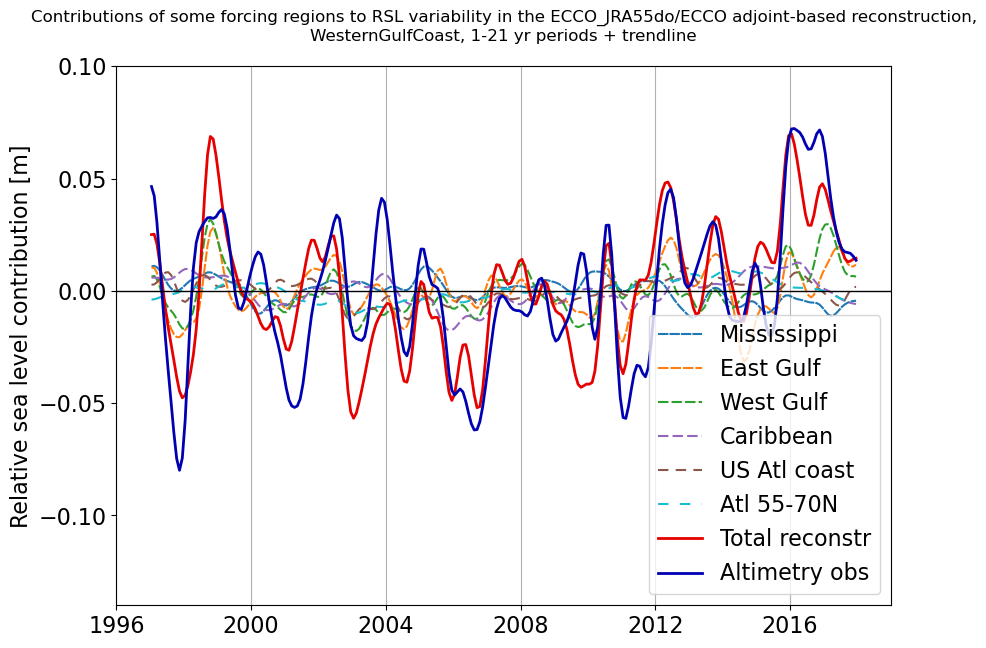

In [12]:
import matplotlib as mpl

region_names = ['Mississippi','East Gulf','West Gulf','Caribbean','Atl 5-25N','FL Straits',\
                'US Atl coast','Atl 25-35N','Atl 35-45N','Atl 45-55N','Atl 55-70N']
n_regions = len(region_names)

range_to_plot = '1-21 yr'
edge_handling_opt = 0

outputs = tseries_bp_in_freq_range(ds_forcsens,regions_impacts,\
                                   high_freq_bound=1/(1*365.24),\
                                   low_freq_bound=1/(45*365.24),\
                                   edge_handling_opt=edge_handling_opt)

curr_linecmap = mpl.colormaps['tab20'].resampled(20)

fig,ax = plt.subplots(1,1,figsize=(10,7))
h = []
# color_mapping = [1,2,4,5,6,7,8]
color_mapping = [0,2,4,8,9,11,10,12,16,17,18]
# color_mapping = list(np.arange(0,n_regions))
for region_num in [0,1,2,3,6,10]:
# for region_num in range(0,n_regions):
    curr_tseries = outputs['regions_bp'][region_num,:] + outputs['regions_trendline'][region_num,:]
    curr_tseries -= np.nanmean(curr_tseries)
    curr_h, = ax.plot(plot_tseries_predtime,\
                      curr_tseries,\
                      color=curr_linecmap(color_mapping[region_num]),linewidth=1.5,linestyle=(0,(5,0.5*(region_num+1))),\
                      label=region_names[region_num])
    h.append(curr_h)
curr_tseries = outputs['reconstr_bp'] + outputs['reconstr_trendline']
curr_tseries -= np.nanmean(curr_tseries)
curr_h, = ax.plot(plot_tseries_predtime,curr_tseries,label='Total reconstr',color=(.9,0,0),linewidth=2)
h.append(curr_h)
curr_tseries = outputs['obs_bp'] + outputs['obs_trendline']
curr_tseries -= np.nanmean(curr_tseries)
curr_h, = ax.plot(plot_tseries_predtime,curr_tseries,label='Altimetry obs',color=(0,0,.7),linewidth=2)
h.append(curr_h)
ax.axhline(y=0,color=(0,0,0),linewidth=1)
ax.grid(axis='x')
ax.set_ylim([-.14,.1])
ax.set_ylabel('Relative sea level contribution [m]')
ax.legend(handles=h)
ax.set_title('Contributions of some forcing regions to RSL variability'\
             +' in the '+case_id+'/ECCO adjoint-based reconstruction,\n'\
             +place_id+', '+range_to_plot+' periods + trendline\n',fontsize=12)
plt.show()

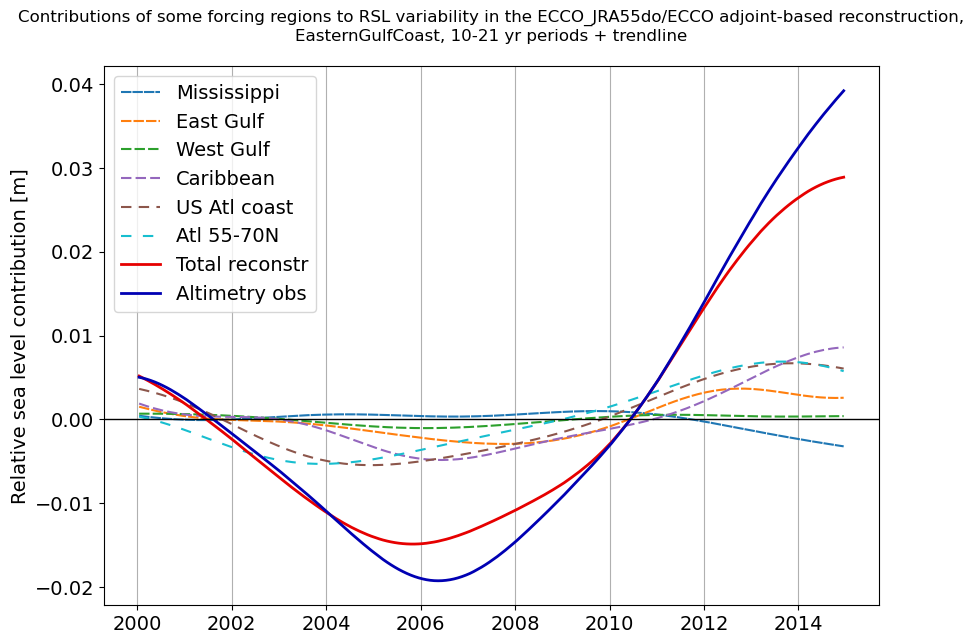

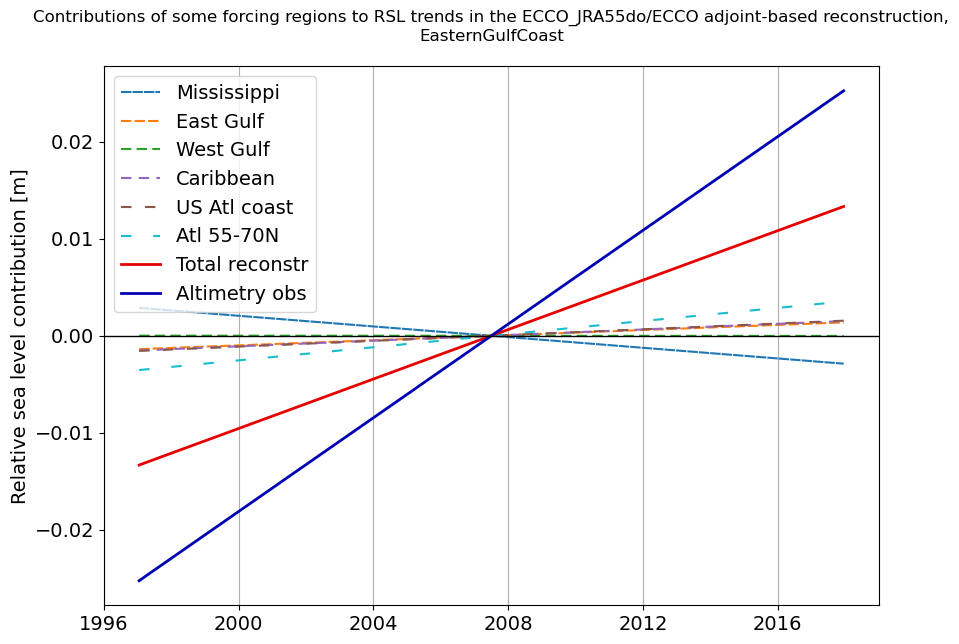

In [8]:
import matplotlib as mpl

region_names = ['Mississippi','East Gulf','West Gulf','Caribbean','Atl 5-25N','FL Straits',\
                'US Atl coast','Atl 25-35N','Atl 35-45N','Atl 45-55N','Atl 55-70N']
n_regions = len(region_names)

range_to_plot = '10-'+str(ds_forcsens.sizes['pred_year'])+' yr'
edge_handling_opt = 1

outputs = tseries_bp_in_freq_range(ds_forcsens,regions_impacts,\
                                   high_freq_bound=1/(10*365.24),\
                                   low_freq_bound=1/(45*365.24),\
                                   # edge_handling_opt=edge_handling_opt)
                                   edge_handling_opt=0)

curr_linecmap = mpl.colormaps['tab20'].resampled(20)

plt.rcParams['font.size'] = 14

fig,ax = plt.subplots(1,1,figsize=(10,7))
h = []
# color_mapping = [1,2,4,5,6,7,8]
color_mapping = [0,2,4,8,9,11,10,12,16,17,18]
# color_mapping = list(np.arange(0,n_regions))
for region_num in [0,1,2,3,6,10]:
# for region_num in range(0,n_regions):
    curr_tseries = outputs['regions_bp'][region_num,:] + outputs['regions_trendline'][region_num,:]
    curr_tseries -= np.nanmean(curr_tseries[36:-36])
    curr_h, = ax.plot(plot_tseries_predtime[36:-36],\
                      curr_tseries[36:-36],\
                      color=curr_linecmap(color_mapping[region_num]),linewidth=1.5,linestyle=(0,(5,0.5*(region_num+1))),\
                      label=region_names[region_num])
    h.append(curr_h)
curr_tseries = outputs['reconstr_bp'] + outputs['reconstr_trendline']
curr_tseries -= np.nanmean(curr_tseries[36:-36])
curr_h, = ax.plot(plot_tseries_predtime[36:-36],curr_tseries[36:-36],label='Total reconstr',color=(.9,0,0),linewidth=2)
h.append(curr_h)
curr_tseries = outputs['obs_bp'] + outputs['obs_trendline']
curr_tseries -= np.nanmean(curr_tseries[36:-36])
curr_h, = ax.plot(plot_tseries_predtime[36:-36],curr_tseries[36:-36],label='Altimetry obs',color=(0,0,.7),linewidth=2)
h.append(curr_h)
ax.axhline(y=0,color=(0,0,0),linewidth=1)
ax.grid(axis='x')
ax.set_ylabel('Relative sea level contribution [m]')
ax.legend(handles=h)
ax.set_title('Contributions of some forcing regions to RSL variability'\
             +' in the '+case_id+'/ECCO adjoint-based reconstruction,\n'\
             +place_id+', '+range_to_plot+' periods + trendline\n',fontsize=12)
if np.abs(edge_handling_opt) < 1.e-5:
    edge_masked_str = ''
else:
    edge_masked_str = '_edgemasked'
plt.savefig('RSL_tseries_contribs_someregions_'+range_to_plot.replace(' ','')+edge_masked_str\
            +'_'+case_id+'_'+varexp_type+'_'+place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
# plt.savefig('RSL_tseries_contribs_allregions_'+range_to_plot.replace(' ','')+edge_masked_str\
#             +'_'+case_id+'_'+varexp_type+'_'+place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()



fig,ax = plt.subplots(1,1,figsize=(10,7))
h = []
# color_mapping = [1,2,4,5,6,7,8]
color_mapping = [0,2,4,8,9,11,10,12,16,17,18]
# color_mapping = list(np.arange(n_regions))
for region_num in [0,1,2,3,6,10]:
# for region_num in range(0,n_regions):
    curr_tseries = outputs['regions_trendline'][region_num,:]
    curr_tseries -= np.nanmean(curr_tseries)
    curr_h, = ax.plot(plot_tseries_predtime,\
                      curr_tseries,\
                      color=curr_linecmap(color_mapping[region_num]),linewidth=1.5,linestyle=(0,(5,region_num+0.5)),\
                      label=region_names[region_num])
    h.append(curr_h)
curr_tseries = outputs['reconstr_trendline']
curr_tseries -= np.nanmean(curr_tseries)
curr_h, = ax.plot(plot_tseries_predtime,curr_tseries,label='Total reconstr',color=(.9,0,0),linewidth=2)
h.append(curr_h)
curr_tseries = outputs['obs_trendline']
curr_tseries -= np.nanmean(curr_tseries)
curr_h, = ax.plot(plot_tseries_predtime,curr_tseries,label='Altimetry obs',color=(0,0,.7),linewidth=2)
h.append(curr_h)
ax.axhline(y=0,color=(0,0,0),linewidth=1)
ax.grid(axis='x')
ax.set_ylabel('Relative sea level contribution [m]')
ax.legend(handles=h)
ax.set_title('Contributions of some forcing regions to RSL trends'\
             +' in the '+case_id+'/ECCO adjoint-based reconstruction,\n'\
             +place_id+'\n',fontsize=12)
if np.abs(edge_handling_opt) < 1.e-5:
    edge_masked_str = ''
else:
    edge_masked_str = '_edgemasked'
plt.savefig('RSL_tseries_contribs_someregions_trendlines'+edge_masked_str\
            +'_'+case_id+'_'+varexp_type+'_'+place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
# plt.savefig('RSL_tseries_contribs_allregions_trendlines'+edge_masked_str\
#             +'_'+case_id+'_'+varexp_type+'_'+place_id+'_allmonths_'+maxlead_id+'lead_'+year_range_id+'.png')
plt.show()

C:\Users\adelman\Documents\py_functions\filter_functions.py:45: RuntimeWarning: divide by zero encountered in log
  bandpass_filter = 0.5*(special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(low_bound/half_power_adj))) - special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(high_bound*half_power_adj))))


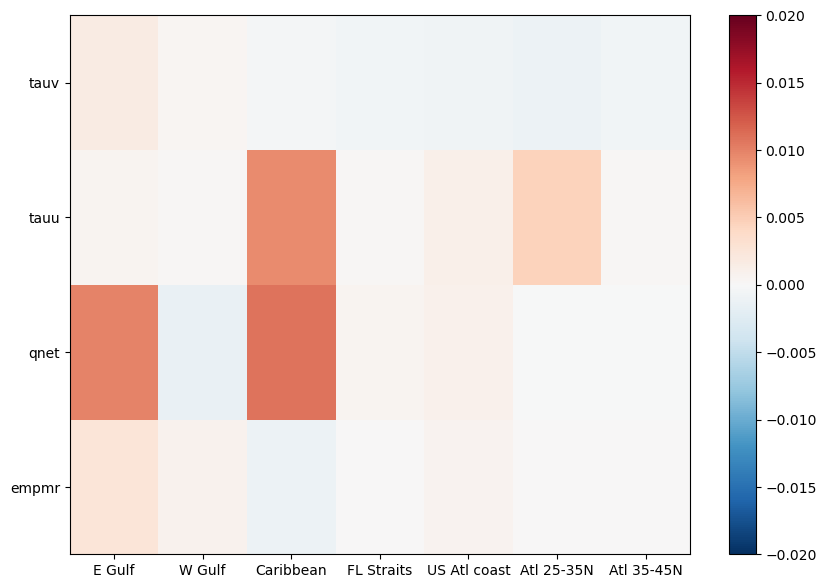

In [12]:
regions_forc_impacts = np.reshape(np.moveaxis(ds_forcsens.preinit_cell_impact_attimes\
                                         .sum('sens_tval').values,(3,0,2,1),(0,1,2,3)),\
                                  (ds_forcsens.sizes['cell'],ds_forcsens.sizes['forc'],-1))
                             
regions_forc_10yrlp,regions_forc_trendline = bandpass_err_fcn(regions_forc_impacts,\
                                            axis=-1,delta_dim=365.24/12,high_bound=1/(10*365.24),power_cutoff_opt=1,\
                                            steepness_factor=2,trend_handling_opt=1,uneven_edge_handling_opt=0)


# difference over given range
start_range = np.datetime64('2010-01-15','ns')
end_range = np.datetime64('2018-01-15','ns')

start_ind = np.argmin(np.abs(plot_tseries_predtime - start_range))
end_ind = np.argmin(np.abs(plot_tseries_predtime - end_range))

regions_forc_10yrlp_change = np.diff(regions_forc_10yrlp[:,:,[start_ind,end_ind]],axis=-1).squeeze()

fig,ax = plt.subplots(1,1,figsize=(10,7))
curr_plot = ax.pcolormesh(np.arange(0,n_regions),np.arange(0,ds_forcsens.sizes['forc']),\
                                    regions_forc_10yrlp_change[:n_regions,:].transpose(),\
                          cmap='RdBu_r',vmin=-.02,vmax=.02)
ax.xaxis.set_ticks(ticks=np.arange(0,n_regions),labels=region_names)
ax.yaxis.set_ticks(ticks=np.arange(0,ds_forcsens.sizes['forc']),labels=ds_forcsens.forc.values)
plt.colorbar(curr_plot)
plt.show()